## Neural Networks in PyTorch
- Define NN model
- Train
- Test

Input → [Hidden Layer → Activation] → Output




In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


# Class in Python

In [3]:
class Calculator:
  def __init__(self):
    print("Calculator ready")

  def add(self, a, b):
    return a + b

calc1 = Calculator()
print(calc1.add(2,3))

Calculator ready
5


# Define the neural network as a class in PyTorch

In [4]:
class ShallowNN(nn.Module):
  def __init__(self):
    super(ShallowNN,self).__init__()
    self.hidden = nn.Linear(1,10)
    self.output = nn.Linear(10,1)

  def forward(self, x):
    x = torch.relu(self.hidden(x))
    x = self.output(x)
    return x

# Initialized model
model = ShallowNN().to(device)


# Train the neural network

In [5]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = torch.linspace(-3, 3, 100).unsqueeze(1).to(device)
y_true = 2 * x + 1 + 0.5 * torch.randn(x.size()).to(device)

#Train
epochs = 20

for epoch in range(epochs):
  model.train()

  y_pred = model(x)
  loss = loss_fn(y_pred, y_true)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"epoch {epoch} completed.")

print("Learned weights:", model.hidden.weight)
print("Learned bias:", model.hidden.bias)


epoch 0 completed.
epoch 1 completed.
epoch 2 completed.
epoch 3 completed.
epoch 4 completed.
epoch 5 completed.
epoch 6 completed.
epoch 7 completed.
epoch 8 completed.
epoch 9 completed.
epoch 10 completed.
epoch 11 completed.
epoch 12 completed.
epoch 13 completed.
epoch 14 completed.
epoch 15 completed.
epoch 16 completed.
epoch 17 completed.
epoch 18 completed.
epoch 19 completed.
Learned weights: Parameter containing:
tensor([[ 0.8558],
        [-0.7238],
        [-0.5615],
        [ 0.4807],
        [ 0.5527],
        [ 0.7498],
        [ 0.4884],
        [ 0.1545],
        [-0.4194],
        [-0.3517]], requires_grad=True)
Learned bias: Parameter containing:
tensor([-0.2214, -0.0312, -0.0052,  0.2848,  0.1277,  0.8239, -0.8539, -0.0991,
        -0.1466, -0.3572], requires_grad=True)


# Plot

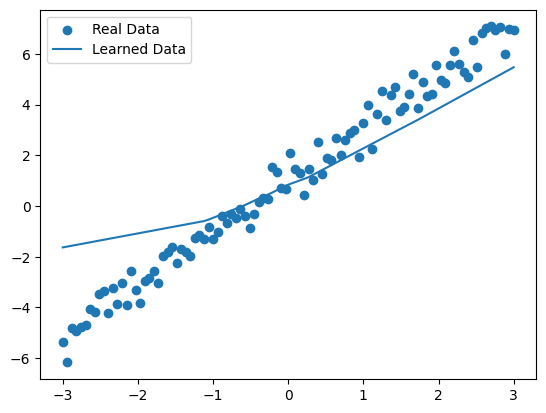

In [6]:
model.eval()

with torch.no_grad():
  y_pred = model(x)

plt.scatter(x.cpu(), y_true.cpu(), label='Real Data')
plt.plot(x.cpu(), y_pred.cpu(), label='Learned Data')
plt.legend()
plt.show()

# Exercise 1: Try sigmoid


--- Training ShallowNN with Sigmoid ---
Epoch 5 completed, Loss: 13.5914
Epoch 10 completed, Loss: 11.5751
Epoch 15 completed, Loss: 9.7737
Epoch 20 completed, Loss: 8.1404

Plotting results for Sigmoid model...


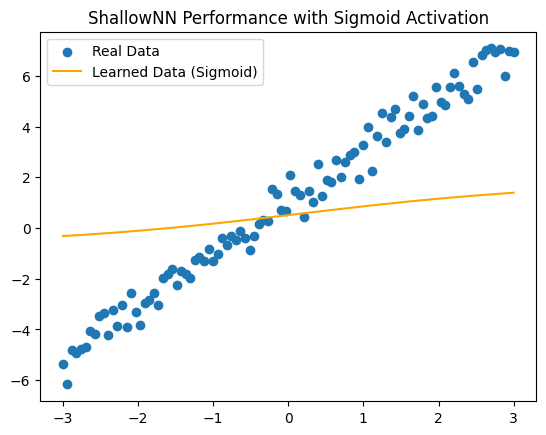

In [14]:
class ShallowNN_Sigmoid(nn.Module):
  def __init__(self):
    super(ShallowNN_Sigmoid,self).__init__()
    self.hidden = nn.Linear(1,10)
    self.output = nn.Linear(10,1)

  def forward(self, x):

    x = torch.sigmoid(self.hidden(x))
    x = self.output(x)
    return x

model_sigmoid = ShallowNN_Sigmoid().to(device)

loss_fn_sigmoid = nn.MSELoss()

optimizer_sigmoid = optim.SGD(model_sigmoid.parameters(), lr=0.01)
epochs = 20
print("\n--- Training ShallowNN with Sigmoid ---")
for epoch in range(epochs):
  model_sigmoid.train()

  y_pred = model_sigmoid(y_true)

  loss = loss_fn_sigmoid(y_pred, y_true)
  optimizer_sigmoid.zero_grad()
  loss.backward()
  optimizer_sigmoid.step()

  if (epoch + 1) % 5 == 0:
    print(f"Epoch {epoch+1} completed, Loss: {loss.item():.4f}")

print("\nPlotting results for Sigmoid model...")
model_sigmoid.eval()

with torch.no_grad():
  y_pred_sigmoid = model_sigmoid(x)
plt.scatter(x.cpu(), y_true.cpu(), label='Real Data')
plt.plot(x.cpu(), y_pred_sigmoid.cpu(), label='Learned Data (Sigmoid)', color='orange')
plt.title("ShallowNN Performance with Sigmoid Activation")
plt.legend()
plt.show()

# Make a deep neural network model

Input → [Linear → ReLU] → [Linear → ReLU] → [Linear → ReLU] → Output



In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

class DeepNet(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )


  def forward(self, x):
    return self.layers(x)


model = DeepNet(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print(model)

# Train

DeepNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [9]:
loss = nn.CrossEntropyLoss()



In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 500
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train)
    train_loss = loss(y_logits, y_train)

    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    train_acc = (y_pred == y_train).sum().item() / len(y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_logits = model(X_test)
        test_loss = loss(test_logits, y_test)

        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_acc = (test_pred == y_test).sum().item() / len(y_test)

    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch 50/500 | Train Loss: 0.3628, Train Acc: 0.8462 | Test Loss: 0.3075, Test Acc: 0.8750
Epoch 100/500 | Train Loss: 0.2936, Train Acc: 0.8912 | Test Loss: 0.2272, Test Acc: 0.8850
Epoch 150/500 | Train Loss: 0.2207, Train Acc: 0.9213 | Test Loss: 0.1497, Test Acc: 0.9450
Epoch 200/500 | Train Loss: 0.1657, Train Acc: 0.9437 | Test Loss: 0.0859, Test Acc: 0.9750
Epoch 250/500 | Train Loss: 0.1540, Train Acc: 0.9500 | Test Loss: 0.0682, Test Acc: 0.9800
Epoch 300/500 | Train Loss: 0.1306, Train Acc: 0.9625 | Test Loss: 0.0646, Test Acc: 0.9750
Epoch 350/500 | Train Loss: 0.1242, Train Acc: 0.9537 | Test Loss: 0.0617, Test Acc: 0.9750
Epoch 400/500 | Train Loss: 0.1205, Train Acc: 0.9600 | Test Loss: 0.0603, Test Acc: 0.9700
Epoch 450/500 | Train Loss: 0.1102, Train Acc: 0.9575 | Test Loss: 0.0562, Test Acc: 0.9800
Epoch 500/500 | Train Loss: 0.1116, Train Acc: 0.9663 | Test Loss: 0.0533, Test Acc: 0.9800


# Exercise 2: Try sigmoid and tanh

In [15]:
# sigmoid
class DeepNet_Sigmoid(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet_Sigmoid, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.Sigmoid(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )

  def forward(self, x):
    return self.layers(x)

model_deep_sigmoid = DeepNet_Sigmoid(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print("--- DeepNet with Sigmoid ---")
print(model_deep_sigmoid)

--- DeepNet with Sigmoid ---
DeepNet_Sigmoid(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Sigmoid()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Sigmoid()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [16]:
# tanh
class DeepNet_Tanh(nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.4):
    super(DeepNet_Tanh, self).__init__()
    self.layers= nn.Sequential(
        nn.Linear(input_dim, hidden_dims[0]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[0], hidden_dims[1]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[1], hidden_dims[2]),
        nn.Tanh(),
        nn.Dropout(dropout_rate),
        nn.Linear(hidden_dims[2], output_dim)
    )

  def forward(self, x):
    return self.layers(x)

model_deep_tanh = DeepNet_Tanh(input_dim=2, hidden_dims=[64, 32, 16], output_dim=2).to(device)
print("\n--- DeepNet with Tanh ---")
print(model_deep_tanh)


--- DeepNet with Tanh ---
DeepNet_Tanh(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=16, out_features=2, bias=True)
  )
)


# Exercise 3: Try other datsets


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

class HousingNet(nn.Module):
    def __init__(self, input_features=8):
        super(HousingNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.layers(x)

housing_model = HousingNet().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(housing_model.parameters(), lr=0.001)

print("\n--- Training on California Housing Dataset ---")
epochs = 200
for epoch in range(epochs):
    housing_model.train()
    y_pred = housing_model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        housing_model.eval()
        with torch.no_grad():
            test_pred = housing_model(X_test)
            test_loss = loss_fn(test_pred, y_test)
        print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")


--- Training on California Housing Dataset ---
Epoch 20, Train Loss: 1.9102, Test Loss: 1.9067
Epoch 40, Train Loss: 0.8715, Test Loss: 0.8527
Epoch 60, Train Loss: 0.7363, Test Loss: 0.7399
Epoch 80, Train Loss: 0.6400, Test Loss: 0.6483
Epoch 100, Train Loss: 0.5646, Test Loss: 0.5775
Epoch 120, Train Loss: 0.5066, Test Loss: 0.5229
Epoch 140, Train Loss: 0.4663, Test Loss: 0.4850
Epoch 160, Train Loss: 0.4390, Test Loss: 0.4553
Epoch 180, Train Loss: 0.4205, Test Loss: 0.4335
Epoch 200, Train Loss: 0.4071, Test Loss: 0.4178


In [18]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=1000, shuffle=False)

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        return self.layers(x)

mnist_model = MNISTNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_model.parameters(), lr=0.001)

print("\n--- Training on MNIST Dataset ---")
epochs = 10
for epoch in range(epochs):
    mnist_model.train()
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)

        pred = mnist_model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    mnist_model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = mnist_model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= len(test_loader)
    correct /= len(test_loader.dataset)
    print(f"Epoch {epoch+1}, Test Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.66MB/s]



--- Training on MNIST Dataset ---
Epoch 1, Test Accuracy: 97.4%, Avg loss: 0.084189
Epoch 2, Test Accuracy: 97.5%, Avg loss: 0.076118
Epoch 3, Test Accuracy: 96.4%, Avg loss: 0.115938
Epoch 4, Test Accuracy: 97.6%, Avg loss: 0.078883
Epoch 5, Test Accuracy: 97.8%, Avg loss: 0.083730
Epoch 6, Test Accuracy: 97.9%, Avg loss: 0.069988
Epoch 7, Test Accuracy: 97.8%, Avg loss: 0.086209
Epoch 8, Test Accuracy: 97.7%, Avg loss: 0.095843
Epoch 9, Test Accuracy: 97.4%, Avg loss: 0.120357
Epoch 10, Test Accuracy: 97.6%, Avg loss: 0.103231
